# CoT with GPT-4

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Step 2: Import Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Step 3: Set Paths
base_dir = '/content/drive/My Drive/Dissertation/FinalDataset'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


In [ ]:
# Step 4: Load the Dataset
batch_size = 32
target_size = (128, 128)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    color_mode='grayscale',
    batch_size=1,  # For precise evaluation
    class_mode='binary',
    shuffle=False
)


Found 2400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
# Step 4: Load the Dataset
batch_size = 32
target_size = (128, 128)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    color_mode='grayscale',
    batch_size=1,  # For precise evaluation
    class_mode='binary',
    shuffle=False
)


Found 2400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
# Step 5: Define the CNN Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 6: Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 7: Train the Model with EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1005s 13s/step - accuracy: 0.5145 - loss: 0.6948 - val_accuracy: 0.4967 - val_loss: 0.6869
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5906 - loss: 0.6730 - val_accuracy: 0.6733 - val_loss: 0.6236
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6750 - loss: 0.6066 - val_accuracy: 0.6800 - val_loss: 0.5892
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7182 - loss: 0.5713 - val_accuracy: 0.6900 - val_loss: 0.5703
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7162 - loss: 0.5652 - val_accuracy: 0.7133 - val_loss: 0.5528
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7324 - loss: 0.5441 - val_accuracy: 0.7367 - val_loss: 0.5421
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7399 - loss: 0.5204 - val_accuracy: 0.7400 - val_loss: 0.5363
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7584 - loss: 0.5053 - val_accuracy: 0.7567 - val_lo

# Analysis


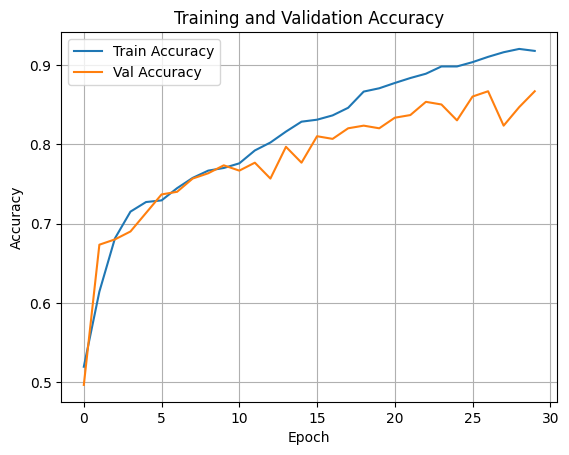

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
test_loss, test_acc = model.evaluate(test_generator)

print(f'Validation Accuracy: {val_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 310ms/step - accuracy: 0.8565 - loss: 0.3338
300/300 ━━━━━━━━━━━━━━━━━━━━ 197s 658ms/step - accuracy: 0.8835 - loss: 0.3222
Validation Accuracy: 0.8667
Test Accuracy: 0.8733


300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step
              precision    recall  f1-score   support

      Impact       0.89      0.85      0.87       150
    Volcanic       0.86      0.89      0.88       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



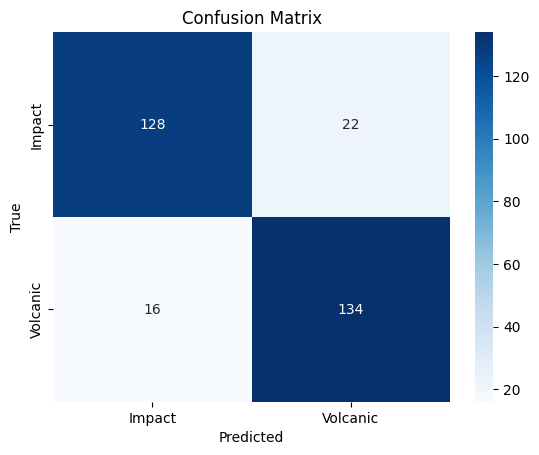

In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_probs = model.predict(test_generator).ravel()
y_pred = (y_probs > 0.5).astype(int)
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=['Impact', 'Volcanic']))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Impact', 'Volcanic'], yticklabels=['Impact', 'Volcanic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save

In [ ]:
# Create folder if it doesn't exist
import os
save_dir = "/content/drive/MyDrive/Dissertation/Models"
os.makedirs(save_dir, exist_ok=True)

# Save model
model.save(os.path.join(save_dir, "EXP_003.h5"))
print(f"Model saved to {os.path.join(save_dir, 'EXP_003.h5')}")

import pickle

# Save history object
with open(os.path.join(save_dir, "EXP_003_history.pkl"), "wb") as f:
    pickle.dump(history.history, f)

print(f"History saved to {os.path.join(save_dir, 'EXP_003_history.pkl')}")


Model saved to /content/drive/MyDrive/Dissertation/Models/EXP_003.h5
History saved to /content/drive/MyDrive/Dissertation/Models/EXP_003_history.pkl
